# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


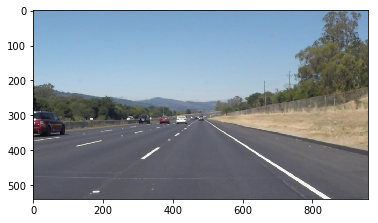

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    
    right_line_x = []
    right_line_y = []
    
    
    
    left_line_x  = []
    left_line_y  = []
    

    
    min_degree = 25 
    max_degree = 40 
    
    for line in lines:  #loop though the lines 
        
        for x1,y1,x2,y2 in line: ### check all points and save to the left_line or to the right_line  
            
                # compute slope (x1, x2, y1, y2) formular (y2-y1)/(x2 - x1)
            
                slope_factor = (y2 - y1)/(x2 - x1) 
                line_degree  =  np.arctan(slope_factor)*180/np.pi
                
                
                if ((line_degree > min_degree and line_degree < max_degree) or (line_degree < -min_degree and line_degree > -max_degree)):

                     if line_degree >= 0: # slope positvie = Right line 
                            
                        right_line_x.extend((x1,x2))
                        right_line_y.extend((y1,y2))
            
            
                     if line_degree < 0: # slope negative = Left line 
                        
                        left_line_x.extend((x1,x2))
                        left_line_y.extend((y1,y2))
            
    
    # compute slope and y-intercept 
            
    right_line_slope, right_line_intercept   = np.polyfit(np.array(right_line_x), np.array(right_line_y), 1) 
    
    
    # add two point (490,320) and (x, 540) compute x first      
    # x = (y - b)/m 
    
    right_x_new = int(round((540 - right_line_intercept)/right_line_slope))
        
        
    right_line_x.extend((490, right_x_new))
    right_line_y.extend((320, 540))
    
    
    
    # find two point on the right lane  
    
    right_x_min = min(right_line_x)
    right_x_max = max(right_line_x)
    
    # y = mx + b 
    
    right_y_min = int(right_line_slope*right_x_min + right_line_intercept)  
    right_y_max = int(right_line_slope*right_x_max + right_line_intercept)  

    
    
    
    right_point_min = (right_x_min, right_y_min) 
    right_point_max = (right_x_max, right_y_max)
    

    
    cv2.line(img, right_point_min, right_point_max, color, thickness)        
            
            
        
        
        
    # compute slope and y-intercept 

            
    left_line_slope, left_line_intercept   = np.polyfit(np.array(left_line_x), np.array(left_line_y), 1)       
    

    
    # add two point (460,320) and (x, 540) compute x first      
    # x = (y - b)/m 
    
       
    left_x_new = int(round((540 - left_line_intercept)/left_line_slope))
        
        
    left_line_x.extend((460, left_x_new))
    left_line_y.extend((320, 540))
    
    
    
    
    # find two point on the left lane  
    
    left_x_min = min(left_line_x)
    left_x_max = max(left_line_x)
    
    
    # y = mx + b 
    
    left_y_min = int(left_line_slope*left_x_min + left_line_intercept)  
    left_y_max = int(left_line_slope*left_x_max + left_line_intercept)  

     
    left_point_min = (left_x_min, left_y_min) 
    left_point_max = (left_x_max, left_y_max)
    
    cv2.line(img, left_point_min, left_point_max, color, thickness)          
            
            
            


            
            
            
            
            
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [4]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

(540, 960, 3)
540
960


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:83: RuntimeWarning: divide by zero encountered in int_scalars


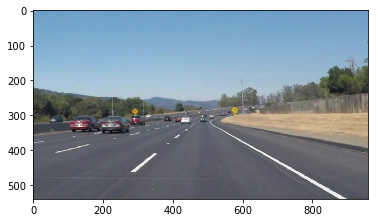

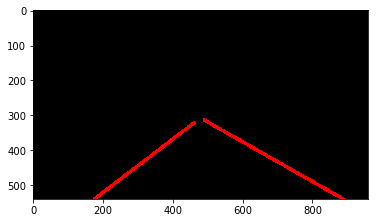

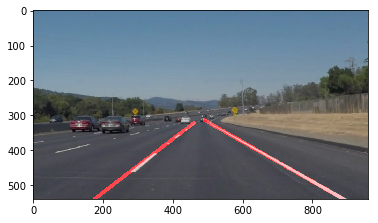

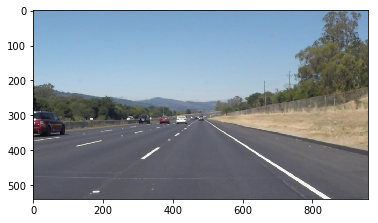

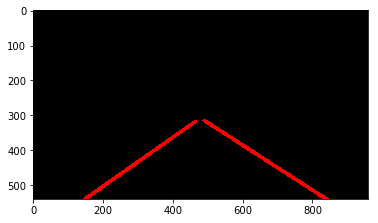

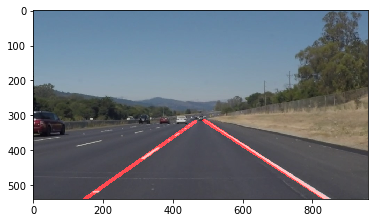

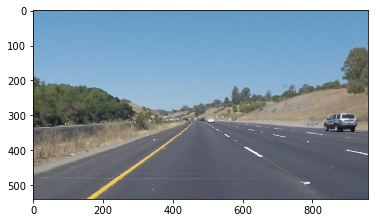

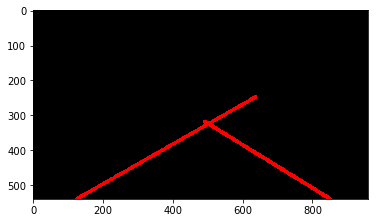

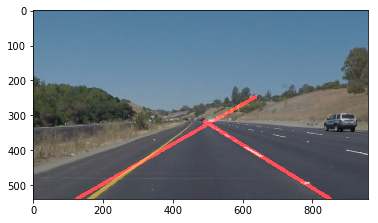

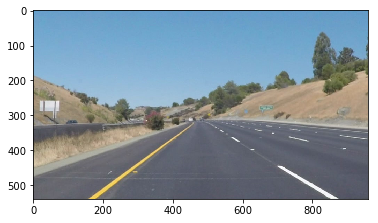

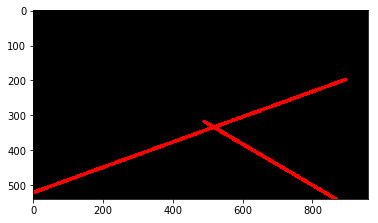

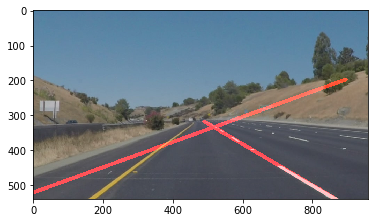

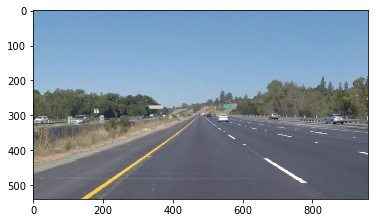

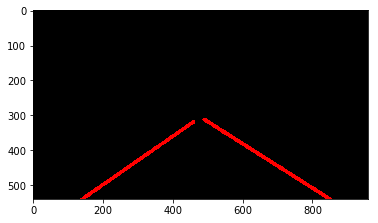

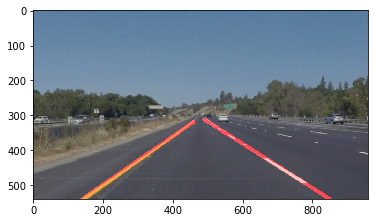

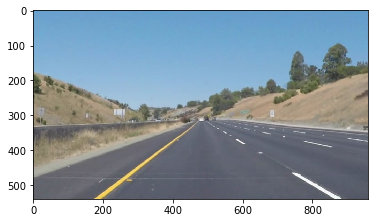

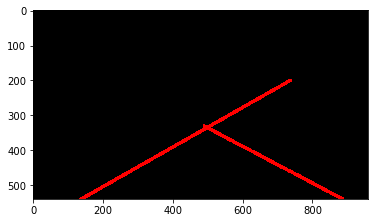

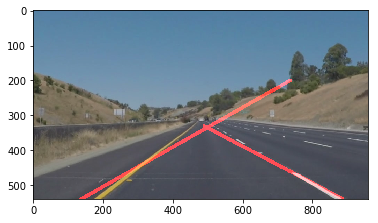

In [6]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.


#Read in and grayscale the image No. 1
image1 = mpimg.imread('test_images/solidWhiteCurve.jpg')
plt.imshow(image1)
gray1  = grayscale(image1)
#plt.figure()
#plt.imshow(gray1)

#Define a kernel size and apply gaussian smoothing 
kernel_size1 = 7
blur_gray1 = gaussian_blur(gray1, kernel_size1)
#plt.figure()
#plt.imshow(blur_gray1)


#Define our parameters for Canny and apply 
low_threshold1 = 50 
high_threshold1 = 150
edges1 = canny(blur_gray1, low_threshold1, high_threshold1) 
#plt.figure()
#plt.imshow(edges1)
#cv2.imwrite('test_images_output/output1_afterCanny.jpg', lines_edges1)

#next crete a marked edges image def region_of_interest(img, vertices):
imshape = image1.shape
print(imshape)  # (540, 960, 3)
print(imshape[0]) # 540
print(imshape[1]) # 960

vertices = np.array([[(0, imshape[0]), (460, 320), (490, 320), (imshape[1], imshape[0])]], dtype = np.int32)
masked_edges1 = region_of_interest(edges1, vertices)
#plt.figure()
#plt.imshow(masked_edges1)

# run hough on edge detected image 
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
lines1 = hough_lines(masked_edges1, rho, theta, threshold, min_line_length, max_line_gap)
plt.figure()
plt.imshow(lines1)

lines_edges1 = weighted_img(lines1, image1)
plt.figure()
plt.imshow(lines_edges1)

cv2.imwrite('test_images_output/output1_connected_twolanes.jpg', lines_edges1)




#############################################################################################

#Read in and grayscale the image No. 2
image2 = mpimg.imread('test_images/solidWhiteRight.jpg')
plt.figure()
plt.imshow(image2)
gray2  = grayscale(image2)


#Define a kernel size and apply gaussian smoothing 
kernel_size2 = 7
blur_gray2 = gaussian_blur(gray2, kernel_size2)

#Define our parameters for Canny and apply 
low_threshold2 = 50 
high_threshold2 = 150
edges2 = canny(blur_gray2, low_threshold2, high_threshold2) 



#next crete a marked edges image def region_of_interest(img, vertices):
imshape = image2.shape
vertices = np.array([[(0, imshape[0]), (460, 320), (490, 320), (imshape[1], imshape[0])]], dtype = np.int32)
masked_edges2 = region_of_interest(edges2, vertices)
#plt.figure()
#plt.imshow(masked_edges1)

# run hough on edge detected image 
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
lines2 = hough_lines(masked_edges2, rho, theta, threshold, min_line_length, max_line_gap)
plt.figure()
plt.imshow(lines2)
#def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
lines_edges2 = weighted_img(lines2, image2)
plt.figure()
plt.imshow(lines_edges2)



cv2.imwrite('test_images_output/output2_connected_twolanes.jpg', lines_edges2)


#######################################################################################################

#Read in and grayscale the image No. 3
image3 = mpimg.imread('test_images/solidYellowCurve.jpg')
plt.figure()
plt.imshow(image3)
gray3  = grayscale(image3)


#Define a kernel size and apply gaussian smoothing 
kernel_size3 = 7 
blur_gray3 = gaussian_blur(gray3, kernel_size3)

#Define our parameters for Canny and apply 
low_threshold3 = 50 
high_threshold3 = 150
edges3 = canny(blur_gray3, low_threshold3, high_threshold3) 



#next crete a marked edges image def region_of_interest(img, vertices):
imshape = image3.shape
vertices = np.array([[(0, imshape[0]), (0,0), (imshape[1], 0), (imshape[1], imshape[0])]], dtype = np.int32)
masked_edges3 = region_of_interest(edges3, vertices)
#plt.figure()
#plt.imshow(masked_edges1)

# run hough on edge detected image 
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
lines3 = hough_lines(masked_edges3, rho, theta, threshold, min_line_length, max_line_gap)
plt.figure()
plt.imshow(lines3)
#def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
lines_edges3 = weighted_img(lines3, image3)
plt.figure()
plt.imshow(lines_edges3)

#cv2.imwrite('test_images_output/output3.jpg', lines_edges3)


##########################################################################################################


#Read in and grayscale the image No. 4
image4 = mpimg.imread('test_images/solidYellowCurve2.jpg')
plt.figure()
plt.imshow(image4)
gray4  = grayscale(image4)


#Define a kernel size and apply gaussian smoothing 
kernel_size4 = 7 
blur_gray4 = gaussian_blur(gray4, kernel_size4)

#Define our parameters for Canny and apply 
low_threshold4 = 50 
high_threshold4 = 150
edges4 = canny(blur_gray4, low_threshold4, high_threshold4) 



#next crete a marked edges image def region_of_interest(img, vertices):
imshape = image4.shape
vertices = np.array([[(0, imshape[0]), (0,0), (imshape[1], 0), (imshape[1], imshape[0])]], dtype = np.int32)
masked_edges4 = region_of_interest(edges4, vertices)
#plt.figure()
#plt.imshow(masked_edges1)

# run hough on edge detected image 
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
lines4 = hough_lines(masked_edges4, rho, theta, threshold, min_line_length, max_line_gap)
plt.figure()
plt.imshow(lines4)
#def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
lines_edges4 = weighted_img(lines4, image4)
plt.figure()
plt.imshow(lines_edges4)

#cv2.imwrite('test_images_output/output4.jpg', lines_edges4)

####################################################################################################################


#Read in and grayscale the image No. 5
image5 = mpimg.imread('test_images/solidYellowLeft.jpg')
plt.figure()
plt.imshow(image5)
gray5  = grayscale(image5)


#Define a kernel size and apply gaussian smoothing 
kernel_size5 = 7 
blur_gray5 = gaussian_blur(gray5, kernel_size5)

#Define our parameters for Canny and apply 
low_threshold5 = 50 
high_threshold5 = 150
edges5 = canny(blur_gray5, low_threshold5, high_threshold5) 



#next crete a marked edges image def region_of_interest(img, vertices):
imshape = image5.shape
vertices = np.array([[(0, imshape[0]), (0,0), (imshape[1], 0), (imshape[1], imshape[0])]], dtype = np.int32)
masked_edges5 = region_of_interest(edges5, vertices)
#plt.figure()
#plt.imshow(masked_edges1)

# run hough on edge detected image 
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
lines5 = hough_lines(masked_edges5, rho, theta, threshold, min_line_length, max_line_gap)
plt.figure()
plt.imshow(lines5)
#def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
lines_edges5 = weighted_img(lines5, image5)
plt.figure()
plt.imshow(lines_edges5)

#cv2.imwrite('test_images_output/output5.jpg', lines_edges5)


##############################################################################################################



#Read in and grayscale the image No. 6
image6 = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')
plt.figure()
plt.imshow(image6)
gray6  = grayscale(image6)


#Define a kernel size and apply gaussian smoothing 
kernel_size6 = 7 
blur_gray6 = gaussian_blur(gray6, kernel_size6)

#Define our parameters for Canny and apply 
low_threshold6 = 50 
high_threshold6 = 150
edges6 = canny(blur_gray6, low_threshold6, high_threshold6) 



#next crete a marked edges image def region_of_interest(img, vertices):
imshape = image6.shape
vertices = np.array([[(0, imshape[0]), (0,0), (imshape[1], 0), (imshape[1], imshape[0])]], dtype = np.int32)
masked_edges6 = region_of_interest(edges6, vertices)
#plt.figure()
#plt.imshow(masked_edges1)

# run hough on edge detected image 
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
lines6 = hough_lines(masked_edges6, rho, theta, threshold, min_line_length, max_line_gap)
plt.figure()
plt.imshow(lines6)
#def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
lines_edges6 = weighted_img(lines6, image6)
plt.figure()
plt.imshow(lines_edges6)


#cv2.imwrite('test_images_output/output6.jpg', lines_edges6)










#kernal_size = 5
#low_threshold = 50
#high_threshold = 150  

#rho = 1
#theta = np.pi/180
#threshold = 1
#min_line_length = 10
#max_line_gap = 1

# solidWhiteCurve 
#image_solidWhiteCurve = mpimg.imread('test_images/solidWhiteCurve.jpg')
#plt.imshow(image_solidWhiteCurve)
#gray_solidWhiteCurve  = grayscale(image_solidWhiteCurve)
#blur_gray_solidWhiteCurve = gaussian_blur(gray_solidWhiteCurve, kernal_size) 
#edges_solidWhiteCurve = canny(blur_gray_solidWhiteCurve, low_threshold, high_threshold)
#plt.figure()
#plt.imshow(edges_solidWhiteCurve, cmap = 'gray')
#line_image_solidWhiteCurve = np.copy(image_solidWhiteCurve)*0 

#lines_solidWhiteCurve = hough_lines(edges_solidWhiteCurve, rho, theta, threshold, min_line_length, max_line_gap)
#draw_lines_solidWhiteCurve = draw_lines(line_image_solidWhiteCurve, lines_solidWhiteCurve, color=[255, 0, 0], thickness=2)

#color_edges_solidWhiteCurve = np.dstack((edges_solidWhiteCurve, edges_solidWhiteCurve, edges_solidWhiteCurve))

#combo_solidWhiteCurve = weighted_img(color_edges_solidWhiteCurve, α=0.8, β=1., λ=0.)
#plt.figure() 
#plt.imshow(combo_solidWhiteCurve)



#images = ['test_images/solidWhiteCurve.jpg',
# 'test_images/solidWhiteRight.jpg',
# 'test_images/solidYellowCurve.jpg',
# 'test_images/solidYellowCurve2.jpg',
# 'test_images/solidYellowLeft.jpg',
# 'test_images/whiteCarLaneSwitch.jpg']

#def process(filename):
#    image = mpimg.imread(filename)
#    #<something gets done here>
#    plt.figure()
#    plt.imshow(image)

#for file in images:
#    process(file)

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [7]:
# Import everything needed to edit/save/watch video clips
import imageio
imageio.plugins.ffmpeg.download()

from moviepy.editor import VideoFileClip
from IPython.display import HTML



In [8]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    gray           = grayscale(image)
    kernel_size    = 7 
    blur_gray      = gaussian_blur(gray, kernel_size)
    low_threshold  = 50 
    high_threshold = 150
    edges          = canny(blur_gray, low_threshold, high_threshold) 

    imshape = image.shape
    vertices = np.array([[(0, imshape[0]), (460, 320), (490, 320), (imshape[1], imshape[0])]], dtype = np.int32)
    masked_edges = region_of_interest(edges, vertices)
   
    rho = 1
    theta = np.pi/180
    threshold = 1
    min_line_length = 10
    max_line_gap = 1
    lines = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)
    lines_edges = weighted_img(lines, image)

    return lines_edges

Let's try the one with the solid white lane on the right first ...

In [9]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
#clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


 99%|███████████████████████████████████████████████████████████████████████████████▎| 125/126 [00:03<00:00, 36.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

Wall time: 4.32 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [11]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|███████████████████████████████████████████████████████████████████████████████▉| 681/682 [00:21<00:00, 32.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

Wall time: 22.1 s


In [12]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [18]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[293 334 548 565 509 563 488 522 312 344 568 605 558 630 381 401 459 487
 446 461 482 497 419 451 603 619 492 519 349 367 463 473 351 363 306 326
 402 430 269 279 280 291 335 348 347 357]
[660 631 490 479 521 487 527 506 662 640 477 456 489 446 599 587 558 536
 557 545 541 529 586 562 456 448 525 509 622 609 545 537 620 611 667 653
 585 567 676 669 685 678 597 589 594 588]
[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4




  0%|                                                                                          | 0/251 [00:00<?, ?it/s]

[293 334 548 565 509 563 488 522 312 344 568 605 558 630 381 401 459 487
 446 461 482 497 419 451 603 619 492 519 349 367 463 473 351 363 306 326
 402 430 269 279 280 291 335 348 347 357]
[660 631 490 479 521 487 527 506 662 640 477 456 489 446 599 587 558 536
 557 545 541 529 586 562 456 448 525 509 622 609 545 537 620 611 667 653
 585 567 676 669 685 678 597 589 594 588]
[292 495 496 587 318 419 561 579 503 521 309 325 480 494 610 633 439 475
 440 453 619 634 265 288 278 304 543 553 427 440 268 278]
[659 523 531 470 658 585 482 470 519 507 664 652 542 531 456 445 572 544
 559 550 451 444 679 663 633 618 494 487 580 570 676 669]




  1%|▋                                                                                 | 2/251 [00:00<00:20, 12.31it/s]

[559 629 254 378 575 592 300 322 532 548 410 426 402 454 465 476 204 227
 485 515 353 376 528 538 401 414 347 360 375 387 207 222 516 533 443 499
 381 400 616 633 446 456 583 599 286 298]
[488 446 685 602 474 462 672 655 507 497 592 581 585 551 544 537 671 659
 530 513 633 617 510 504 599 590 638 629 605 596 674 665 512 500 568 529
 613 601 449 441 555 549 469 458 682 672]
[259 342 586 601 448 462 292 324 334 352 434 470 372 387 485 574 514 524
 366 377 527 537 548 571 382 396 571 583 496 506 582 592 385 395 546 558
 362 374 407 421 470 480 345 358 356 368 325 335 391 401 407 417 604 614
 267 277]
[684 628 467 457 566 555 679 655 649 635 564 542 606 597 541 479 514 506
 626 617 504 498 490 477 599 591 482 473 526 518 475 467 611 604 492 485
 613 606 582 574 550 544 625 617 617 610 655 647 606 599 594 588 460 455
 678 671]




  2%|█▎                                                                                | 4/251 [00:00<00:18, 13.14it/s]

[291 302 388 406 470 519 456 467 321 337 601 622 445 462 596 636 265 275
 341 373 411 442 319 332 416 429 529 540 403 413 340 356 488 504 334 345
 527 542 467 480 384 400 540 556 304 315 298 310 563 575 561 571]
[664 655 610 597 544 511 553 545 659 647 459 446 570 557 466 444 682 674
 629 606 581 562 644 634 590 581 505 496 587 581 644 633 540 530 648 641
 513 501 555 545 600 588 497 487 671 663 659 650 487 480 489 483]
[407 429 375 399 441 457 448 470 337 392 467 486 313 358 594 623 273 311
 601 611 529 540 493 516 472 484 518 530 552 566 521 539 300 316 590 607
 271 290 566 579 626 638 583 593 533 548]
[599 582 608 591 574 564 559 546 648 608 556 544 649 618 463 446 677 650
 463 458 512 503 529 514 543 536 520 510 495 487 510 499 675 662 465 455
 678 664 486 478 446 440 474 469 502 493]
[531 543 465 529 306 321 573 620 575 597 298 324 535 571 362 384 373 419
 267 279 429 470 440 450 551 561 361 409 414 430 357 371 614 624 408 418
 334 346 501 520 498 508 320 334 425 435 420 431]
[504



  3%|██▎                                                                               | 7/251 [00:00<00:16, 14.72it/s]

[613 625 448 493 599 614 609 621 302 330 425 447 402 430 334 362 433 456
 578 596 387 400 339 372 270 280 438 455 581 591 292 305 382 392 308 332
 524 536 498 514 500 513 295 315 515 535 551 565]
[452 445 560 529 465 455 459 451 675 656 576 562 605 584 652 633 582 566
 477 467 603 593 634 613 681 673 567 556 471 464 666 656 606 598 654 639
 509 500 534 523 524 516 680 667 521 507 490 481]
[444 460 297 451 422 435 332 382 383 405 486 503 292 322 462 483 594 605
 581 615 494 506 519 529 578 594 429 449 518 528]
[562 552 681 569 578 570 640 607 605 591 533 523 667 648 561 544 463 455
 476 454 537 527 511 505 477 467 573 560 513 506]




  4%|██▉                                                                               | 9/251 [00:00<00:15, 15.71it/s]

[549 571 287 411 339 501 575 585 591 603 504 523 430 448 300 314 608 630
 447 459 306 326 563 577 476 486 462 473 535 551 494 507]
[499 482 674 587 654 532 475 468 464 458 531 516 574 560 682 671 460 447
 562 552 678 662 483 473 542 534 550 544 502 490 530 520]
[453 529 437 483 292 306 276 288 363 401 383 433 590 604 514 556 538 549
 330 343 318 331 500 511 503 514]
[559 506 581 546 672 663 683 676 637 607 608 572 470 463 525 493 501 492
 646 636 671 661 535 526 525 517]




  4%|███▌                                                                             | 11/251 [00:00<00:14, 16.55it/s]

[540 604 492 577 275 333 577 589 413 442 495 521 497 522 453 464 359 382
 481 495 518 528 463 474 473 483 390 403 402 416 415 426 378 394 340 357
 376 390 377 388 602 634 536 547 522 532]
[504 461 532 473 684 642 474 465 597 576 537 519 528 510 559 550 625 607
 547 538 520 514 552 543 553 547 615 605 594 583 585 576 624 613 638 625
 578 569 612 603 457 442 507 500 517 511]
[373 415 271 317 467 489 537 595 421 437 331 343 341 353 432 457 321 367
 299 313 378 392 388 404 587 602 472 484 302 320 569 582 512 536 537 571
 273 285 409 420]
[627 597 685 654 548 534 507 466 580 570 603 596 636 628 585 565 667 633
 684 674 611 600 604 592 466 457 555 545 681 669 479 469 518 500 506 482
 685 677 589 581]
[530 551 563 583 436 451 285 298 318 354 539 549 352 427 310 356 303 314
 471 489 578 599 431 441 269 293 411 422 286 296 486 496 580 605 605 622
 286 296 446 458 374 391 516 526 547 558]
[510 496 481 469 569 560 675 667 652 628 498 490 643 588 674 641 680 672
 546 532 471 459 573 567 638 624 58



  6%|████▌                                                                            | 14/251 [00:00<00:13, 17.35it/s]

[413 427 388 429 460 502 472 488 436 463 611 621 580 606 564 609 328 352
 489 500 545 561 273 288 326 352 521 536 554 564 571 585 495 505 302 315
 512 522 366 386 407 419]
[585 576 617 585 552 523 553 542 580 561 452 446 474 458 480 452 645 629
 540 533 493 483 684 673 663 644 516 506 492 486 480 472 527 521 664 654
 515 509 618 605 589 582]
[389 443 299 451 272 432 529 549 414 450 497 508 594 614 556 569 589 619
 612 629 570 582 583 596 547 560 535 549 482 492 590 619 496 507 544 555]
[617 576 684 569 685 573 503 491 585 560 534 526 465 455 491 483 463 447
 455 447 481 474 472 465 497 489 506 497 537 529 463 448 536 527 499 493]




  6%|█████▏                                                                           | 16/251 [00:00<00:13, 17.77it/s]

[590 600 350 499 574 584 427 451 274 292 515 525 572 582 578 600 354 387
 330 365 332 351 556 567 390 407 317 345 309 323 500 532 404 415]
[463 456 631 523 472 467 588 568 684 672 512 506 480 472 476 461 642 618
 660 635 644 629 484 478 615 603 670 650 660 649 531 507 604 597]
[564 596 438 513 346 373 384 459 399 423 324 338 276 295 505 523 531 555
 337 360 301 315 414 435 474 496 493 503 557 567]
[485 464 568 514 650 628 621 562 595 579 650 639 684 671 528 514 503 486
 641 623 683 673 584 570 551 535 529 522 490 484]
[550 564 280 299 492 572 336 378 411 522 433 480 402 421 534 547 420 433
 335 371 303 313 606 621 493 503 592 603 396 406 338 349]
[490 479 682 668 537 479 658 624 586 508 582 547 606 592 500 492 592 583
 642 616 665 657 455 447 537 530 466 460 611 604 639 631]




  8%|██████▏                                                                          | 19/251 [00:01<00:12, 19.05it/s]

[443 466 508 523 560 599 616 626 278 325 415 425 469 556 554 598 414 424
 342 379 482 493 327 356 438 450 561 587]
[564 547 518 509 489 463 451 446 683 648 583 577 555 491 487 459 596 590
 637 609 537 528 664 641 578 570 482 465]
[594 626 346 358 298 342 577 621 504 522 403 507 382 411 580 602 453 470
 368 378 575 587 317 329 397 409 590 610 548 560 288 307 626 638 567 582
 353 364 493 507 558 570 274 288 566 579 407 420 365 375 425 437]
[461 446 634 624 685 653 476 452 529 517 592 519 621 600 469 458 567 555
 617 611 472 466 655 645 596 589 468 457 491 482 675 662 451 445 483 474
 643 636 537 528 489 482 685 676 478 471 602 593 634 627 588 580]




  8%|██████▊                                                                          | 21/251 [00:01<00:12, 18.31it/s]

[491 532 308 319 289 313 393 406 406 432 574 586 598 618 461 491 434 451
 362 398 351 369 329 341 469 483 328 345 281 296 547 559 557 571 303 317
 523 538 338 352 452 462 314 327 440 450]
[530 500 676 668 672 656 611 602 589 571 477 471 459 449 560 539 580 568
 621 594 644 629 661 651 544 536 644 633 678 668 490 483 483 475 662 653
 514 503 637 628 556 550 654 646 564 558]
[329 421 528 542 322 336 381 417 456 478 437 458 501 511 468 490 570 619
 336 353 323 337 440 454 615 635 293 304 475 489 589 611 629 643 486 500
 274 284 571 586 614 624 308 322]
[644 579 510 501 649 640 622 593 554 540 567 554 522 516 557 539 475 449
 655 643 665 655 576 567 456 446 671 662 541 532 469 457 450 443 533 524
 684 676 475 467 452 447 676 667]




  9%|███████▍                                                                         | 23/251 [00:01<00:12, 17.82it/s]

[354 438 540 572 297 457 531 559 459 473 425 459 465 475 470 483 287 304
 477 487 483 510 485 497 318 332 594 611 580 596 495 507 576 589 523 534
 603 613 584 594]
[626 567 502 479 684 564 502 482 552 543 577 553 558 551 544 536 674 662
 539 533 545 523 533 526 653 642 466 458 469 460 526 519 472 465 514 505
 461 456 472 467]
[581 595 348 412 529 581 305 341 474 578 531 563 340 364 514 538 389 422
 411 427 287 298 455 472 311 322 333 346 318 331 600 614 436 446 417 427]
[468 461 645 598 508 473 661 634 540 470 500 479 636 618 519 503 601 579
 598 587 674 666 564 552 673 665 656 647 606 598 458 451 579 572 581 575]




 10%|████████                                                                         | 25/251 [00:01<00:12, 17.70it/s]

[578 590 450 463 501 513 466 478 597 607 252 272 621 632 275 295 285 413
 383 415 514 536 309 323 428 450 545 555 306 316 428 442 446 456 588 604
 324 337 406 416 490 504]
[475 469 557 549 529 521 547 537 465 459 645 633 449 443 682 669 675 585
 621 595 512 498 675 666 586 568 492 484 678 671 574 564 560 554 465 456
 665 655 589 583 530 519]
[444 456 571 594 407 519 527 565 477 489 527 593 396 422 344 358 377 391
 414 424 366 378 302 316 434 450 400 413 301 312 278 292 327 341 333 345
 318 330 520 531 465 477 590 600]
[571 563 480 465 587 508 509 483 546 538 502 461 595 577 649 639 623 613
 594 588 618 608 681 671 579 568 605 596 665 656 681 670 646 635 642 632
 669 660 515 507 555 547 468 463]
[434 450 593 622 326 370 272 309 507 518 417 428 435 463 521 531 532 560
 558 569 579 597 379 399 629 639 576 588 343 355 315 330 387 402 474 484]
[567 557 466 452 646 613 685 657 517 508 592 583 579 556 513 507 505 487
 483 475 474 465 608 593 449 444 476 470 634 625 654 642 601 590 540 532]




 11%|█████████                                                                        | 28/251 [00:01<00:12, 18.57it/s]

[545 557 422 454 476 514 306 399 582 595 330 352 358 374 534 545 423 462
 500 521 450 474 275 324 530 541 369 381 577 587 600 621 510 522]
[491 482 576 552 537 510 676 605 473 465 642 625 622 609 498 490 586 557
 529 512 556 538 681 645 507 498 614 604 470 465 458 448 514 505]
[371 435 609 621 416 428 444 457 506 558 269 345 494 511 591 610 329 341
 470 481 457 486 320 361 351 402 558 570 586 598 530 579 558 577 399 409
 338 348]
[626 576 455 448 580 570 559 551 523 488 684 629 524 513 468 459 642 633
 542 533 560 539 664 632 625 590 489 480 471 465 500 470 482 471 591 585
 651 643]
[531 543 291 303 424 488 490 526 545 604 307 324 421 450 313 323 537 583
 380 406 279 289 328 338 350 365 471 482 475 500]
[501 492 685 676 574 528 535 510 491 457 673 661 587 566 652 646 503 473
 618 598 676 670 641 635 627 615 549 542 538 520]




 12%|██████████                                                                       | 31/251 [00:01<00:11, 19.97it/s]

[308 319 387 428 353 380 570 582 488 500 480 507 601 618 574 598 418 439
 507 560 612 630 528 548 598 623 434 478 452 466 337 353 601 613]
[655 646 612 580 622 604 480 474 537 527 534 515 463 454 473 461 589 572
 516 481 458 448 508 496 460 448 566 534 562 553 633 623 459 452]
[497 507 263 418 561 583 310 389 429 453 523 533 587 613 429 444 381 397
 456 468 477 489 562 577 289 310 541 551 592 625 493 510 418 429]
[523 515 685 576 487 473 668 610 580 561 506 498 466 453 569 557 615 604
 549 542 536 527 480 473 683 669 493 488 468 451 533 521 588 579]
[561 628 477 494 500 522 263 344 497 554 415 432 382 400 483 496 462 472
 344 354 398 408 578 631 286 305 512 525 564 591 373 389 469 482 359 370]
[486 449 536 524 520 505 685 628 523 485 577 565 613 601 539 531 554 548
 627 621 589 583 471 444 685 672 519 511 479 465 620 609 549 541 631 622]




 14%|██████████▉                                                                      | 34/251 [00:01<00:10, 21.18it/s]

[442 483 445 459 353 375 508 524 266 298 379 392 431 469 303 335 409 419
 621 633 341 357 585 617 523 539 478 492 504 515 549 561 570 581 401 414
 353 364 478 491]
[559 533 558 549 620 606 515 505 683 659 603 593 577 551 672 649 593 587
 450 444 644 633 468 451 513 501 545 534 527 518 490 482 483 475 588 578
 635 626 535 527]
[415 481 521 586 413 449 551 569 293 322 311 336 523 537 263 291 333 343
 519 529 444 458 330 352 385 401 299 318 338 354 582 599 352 371 486 496
 532 543]
[590 542 507 469 579 556 495 483 663 642 665 648 512 504 684 663 649 643
 509 503 558 550 636 622 611 600 674 661 630 620 470 462 635 622 539 533
 506 500]
[484 522 568 597 580 592 261 276 287 354 558 573 366 386 455 472 536 554
 314 326 549 570 518 530 354 382 427 438 405 419 460 477 375 403 604 630
 351 365 404 417 607 621 334 352 503 517 306 318 532 546]
[540 512 483 467 471 465 682 673 682 633 485 475 610 598 560 549 504 493
 609 603 495 483 516 507 632 613 581 572 584 575 547 536 617 598 462 449
 620 612 5



 15%|███████████▉                                                                     | 37/251 [00:01<00:09, 21.89it/s]

[281 389 459 522 407 419 255 274 517 545 431 464 389 412 543 554 365 375
 300 332 581 607 493 530 570 584 442 453 282 292 419 434 563 573 571 585]
[685 607 558 512 595 587 685 672 510 492 567 544 595 580 500 492 612 604
 656 633 470 456 525 501 482 474 559 551 668 660 586 576 481 476 476 469]


TypeError: expected non-empty vector for x



 15%|███████████▉                                                                     | 37/251 [00:18<01:45,  2.03it/s]

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))